<a href="https://colab.research.google.com/github/VishalKumar-GitHub/Python/blob/main/Vishal_Python_Advance_Level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ✅ Python Advanced Level - 15 Days Roadmap

### 🔹 Day 1: Advanced Iterators and Generators
- Iterators vs Generators
- `yield`, `next()`, `iter()`
- Generator expressions

Practice:
- Create a custom iterator class
- Build a generator for Fibonacci series

##### ✅ Topics to Learn:
- **Iterators vs Generators**:
  - Iterator: An object with `__iter__()` and `__next__()` methods.
  - Generator: A simpler way to create iterators using the `yield` keyword.

- **`yield`**:
  - Used in functions to return a generator object.
  - Suspends the function’s state, which can be resumed later.

- **`next()` & `iter()`**:
  - `next(iterator)` → Gets the next item from an iterator.
  - `iter(iterable)` → Returns an iterator from an iterable.

- **Generator Expressions**:
  - Like list comprehensions but with `()` instead of `[]`.
  - Lazy evaluation (values generated on the fly).

---

✅ 1. Custom Iterator:

In [ ]:
# Create a custom iterator class

# Define a class to generate even numbers up to a given maximum
class EvenNumbers:
    def __init__(self, max):
        # Start number is initialized to 0
        self.num = 0
        # Maximum number up to which even numbers will be generated
        self.max = max

    def __iter__(self):
        # Returns the iterator object itself
        return self

    def __next__(self):
        # Stop iteration if the current number exceeds the maximum
        if self.num > self.max:
            raise StopIteration
        # Store current number to return
        current = self.num
        # Increment by 2 to get the next even number
        self.num += 2
        return current

# Create an instance of the EvenNumbers class with a max of 10
evens = EvenNumbers(10)

# Iterate over the custom iterator and print even numbers
for n in evens:
    print(n)

0
2
4
6
8
10


✅ 2. Fibonacci Generator:

In [ ]:
def fibonacci(limit):
    a, b = 0, 1
    while a < limit:
        yield a
        a, b = b, a + b

for i in fibonacci(50):
    print(i)

0
1
1
2
3
5
8
13
21
34


✅ 3. Generator Expression:

In [ ]:
squares = (x*x for x in range(1, 7))
for s in squares:
    print(s)

1
4
9
16
25
36


### 🔹 Day 2: Decorators
- Function decorators
- `@wraps` from `functools`
- Chaining decorators

Practice:
- Timer decorator
- Logging decorator


---
🔹 What are Decorators?
- Decorators are functions that **modify the behavior** of other functions without changing their code.

- They're commonly used for **logging, access control, timing, memoization**, etc.

🔹 Function Decorators
- A decorator is a function that **takes another function** as input and returns a function that **modifies** the behavior of the original function.

In [ ]:
def greet_decorator(func):
  def wrapper():
    print("Before the function call")
    func()
    print("After the function call")
  return wrapper

@greet_decorator
def say_hi():
  print("Hi Ankit")

say_hi()

Before the function call
Hi Ankit
After the function call


🔹 Using `@wraps` from `functools`
- When you decorate a function, the **original function's metadata** (name, docstring, etc.) gets replaced by the decorator. To preserve the original function’s properties, we use `@wraps` from the `functools` module.

In [ ]:
from functools import wraps

def greet_decorator(func):
  @wraps(func)
  def wrapper():
    print("Before the function call")
    func()
    print("After the function call")
  return wrapper

@greet_decorator
def say_hi():
    """Says hi."""
    print("Hi Ankt")

print(say_hi.__name__)  # Output: say_hi
print(say_hi.__doc__)   # Output: Says hi.

say_hi
Says hi.


In [ ]:
def decorator(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    print("Before the function call")
    result = func(*args, **kwargs)
    print("After the function call")

    return result
  return wrapper

@decorator
def add(a, b):
  return a + b

print(add(30, 48))

Before the function call
After the function call
78


🔹Practice: Chaining Multiple Decorators
- Multiple decorators can be stacked on a function. The decorators are applied **from bottom to top** (meaning the decorator closest to the function is applied first).

In [ ]:
def ankit(func):
    def wrapper():
        return "<b>" + func() + "</b>"
    return wrapper

def vishal(func):
    def wrapper():
        return "<i>" + func() + "</i>"
    return wrapper

@ankit
@vishal
def get_text():
    return "Hindi"

print(get_text())  # Output: <b><i>Python</i></b>

<b><i>Hindi</i></b>


🔹 Practice: Timer Decorator and Logging Decorator

**Timer Decorator**

A **Timer decorator** is used to measure how long a function takes to execute.

In [ ]:
import time
from functools import wraps  # ✅ Needed to preserve function metadata

# ✅ Timer decorator to measure function execution time
def timer(func):
    @wraps(func)  # ✅ Keeps original function name, docstring, etc.
    def wrapper(*args, **kwargs):
        start_time = time.time()  # ✅ Start the timer
        result = func(*args, **kwargs)  # ✅ Call the actual function
        end_time = time.time()  # ✅ End the timer
        print(f"Function {func.__name__} took {end_time - start_time:.2f} seconds to execute.")
        return result
    return wrapper

# ✅ Apply the decorator to a slow function
@timer
def slow_funtion():
    time.sleep(2)  # ⏲️ Simulate slow task (2 seconds)
    print("Slow function finished!")

# ✅ Call the decorated function
slow_funtion()

Slow function finished!
Function slow_funtion took 2.00 seconds to execute.


### 🔹 Day 3: Context Managers
- `with` statement
- Creating custom context managers using `__enter__` & `__exit__`
- `contextlib` module

Practice:
- File handler with context manager
- Custom database connection manager

🔹 What is a Context Manager?
- A context manager is used to **manage resources** like `files, connections,` etc.
It ensures setup and cleanup actions are handled automatically.

🔹 `with` Statement

Instead of:

In [ ]:
file = open("data.txt", "w")
content = file.write("My name is Ankit")
file.close()

In [ ]:
file = open("data.txt", "r")
content = file.read()
file.close()

Use:

In [ ]:
with open("data.txt", "w") as file:
    content = file.write("My name is Ankit")

✅  Creating custom context managers using `__enter__` and `__exit__`

In [ ]:
class Mycontext:
  def __enter__(self):  # This method runs when entering the 'with' block
    print("Entering content...")
    return "Resource Ready"  # This value is assigned to the variable 'resource'

  def __exit__(self, exc_type, exc_val, exc_tb):  # This method runs when exiting the 'with' block
      print("Exiting content...")

with Mycontext() as resource:  # Enters the context using __enter__()
  print(resource)  # Prints the value returned by __enter__() → "Resource Ready"

Entering content...
Resource Ready
Exiting content...


✅ Using `contextlib` Module

In [ ]:
from contextlib import contextmanager

@contextmanager
def my_context():
    print("Entering content...")
    yield "Resource Ready"
    print("Exiting content...")

with my_context() as resource:
    print(resource)

Entering content...
Resource Ready
Exiting content...


🔹 Practice:

1. File Handler with Context Manager

In [ ]:
with open("data.txt", "w") as file:
    file.write("My name is Ankit")
    print("File written successfully!")

File written successfully!


2. Custom Database Connection Manager (Simulated)

In [ ]:
class Dbconnection:
  def __enter__(self):
    print("Connecting to database...")
    return "Database Connection"

  def __exit__(self, exc_type, exc_val, exc_tb):
    print("Closing database connection...")

with Dbconnection() as db:
  print(db)

Connecting to database...
Database Connection
Closing database connection...


### 🔹 Day 4: Closures & Scopes
- Local vs Global scope
- Enclosing function scope
- Closures

Practice:
- Closure for caching (memoization)
- Variable shadowing exercise

✅ Local vs Global Scope:
- **Local scope**: Variables declared inside a function. Only accessible there.
- **Global scope**: Variables declared outside functions. Accessible throughout the script unless shadowed.

✅ Enclosing Function Scope (LEGB Rule):
- When a function is inside another function, the inner function has access to variables in the outer function.
- Python follows the **LEGB** rule to resolve names: **Local > Enclosing > Global > Built-in**.

✅ Closures:
- A closure is a function object that remembers values in enclosing scopes even if they are not in memory anymore.
- Occurs when an inner function is returned by an outer function and uses its variables.

🔹 Practice:

In [ ]:
def outer_function(msg):
  def inner_funtion():
    print(f"Message: {msg}")
  return inner_funtion

my_func = outer_function("Hello, Vishal")
my_func()

Message: Hello, Vishal


In [ ]:
#fib(0) = 0
#fib(1) = 1
#fib(2) = fib(1) + fib(0) = 1
#fib(3) = fib(2) + fib(1) = 2
#fib(4) = fib(3) + fib(2) = 3
#...
#fib(n) = fib(n-1) + fib(n-2)

In [ ]:
# Closure for caching (memoization)
def fibonacci():
    cache = {}  # This dictionary will store previously calculated Fibonacci numbers

    def fib(n):
        if n in cache:
            return cache[n]  # Return cached result if already calculated

        if n <= 1:
            result = n       # Base cases: fib(0) = 0, fib(1) = 1
        else:
            result = fib(n-1) + fib(n-2)  # Recursive call

        cache[n] = result   # Save result to cache
        return result

    return fib

fib = fibonacci()
print(fib(10))


55


In [ ]:
#Variable shadowing exercise
x = 10   #This defines a global variable x with value 10.

def outer():
  x = 20    #Inside outer(), a local variable x is created with value 20.
  print("Outer x:", x)    #It shadows the global x

  def inner():
    x = 30    #Inside inner(), another local variable x is defined with value 30.
    print("Inner x:", x)   #It shadows the x from outer() during this function call.

  inner()
  print("Outer x after inner call:", x)

outer()
print("Global x:", x)

Outer x: 20
Inner x: 30
Outer x after inner call: 20
Global x: 10


### 🔍 Variable Scope Explanation

Each `x` exists in a separate scope:

- **Global `x` = 10** → Defined at the top of the script.
- **Outer function `x` = 20** → Defined inside the `outer()` function. Shadows the global `x` within this function.
- **Inner function `x` = 30** → Defined inside the `inner()` function. Shadows the `x` from the enclosing `outer()` function.

✅ None of them overwrite each other because they are all **local to their respective scopes**.

Python follows the **LEGB rule** when resolving variables:

**L**ocal → **E**nclosing → **G**lobal → **B**uilt-in


### 🔹 Day 5: Advanced OOP - Part 1
- Class vs Instance vs Static methods
- Properties using `@property`
- Magic/Dunder methods (`__str__`, `__repr__`, `__eq__`, etc.)

#### 🔹 Practice:

✅ Create a **BankAccount** class that tracks balance and transaction history.  
✅ Use `@property` to safely expose balance.  
✅ Overload `+` operator to combine two accounts.  
✅ Implement `__str__()` to print account details clearly.

**Instance Method** (default):

- Takes `self` as the first argument. Can access and modify object attributes.

Example:

In [ ]:
class Ankit:
  def greet(self):
    print("Hello!")

**Class Method**:
- Takes `cls` as the first argument. Used to work with the class itself, not instances.

- Decorated with `@classmethod`.

In [ ]:
class Ankit:
  count = 0  # Class attribute

  @classmethod
  def how_many(cls):
      return cls.count

**Static Method**:
- Does not take `self` or `cls`. Behaves like a regular function but lives inside the class.

- Decorated with `@staticmethod`.

In [ ]:
class MathUtils:
  @staticmethod
  def add(a, b):
      return a + b

 2. `@property` **Decorator**

- Allows you to **access a method like an attribute**.

- Commonly used for **read-only access** or calculated values.

In [ ]:
class circle:
  def __init__(self, radius):
    self.radius = radius

  @property
  def area(self):
    return 3.14 * self.radius ** 2

c = circle(5)
print(c.area)

78.5


**🔹 3. Magic/Dunder Methods**

**Dunder = Double Underscore**, e.g., `__str__`, `__repr__`, `__eq__`


- `__str__`: Returns a readable string for the user (print() output)

- `__repr__`: Returns a developer-friendly string (used in debugging)

- `__eq__`: Defines what makes two objects equal (==)

Example:

In [ ]:
class Book:
  def __init__(self, title):
    self.title = title

  def __str__(self):
    return f"Book: {self.title}"

  def __eq__(self, other):
    return self.title == other.title


🔹 Practice: Bank Account Class

In [ ]:
class BankAccount:
    def __init__(self, name):
        self._balance = 0
        self.transactions = []
        self.name = name

    def deposit(self, amount):
        self._balance += amount
        self.transactions.append(f"Deposited: ${amount}")

    def withdraw(self, amount):
        if amount <= self._balance:
            self._balance -= amount
            self.transactions.append(f"Withdrew: ${amount}")
        else:
            print("Insufficient funds!")

    @property
    def balance(self):
        return self._balance

    def __str__(self):
        return f"Account: {self.name}, Balance: ${self._balance}"

    def __add__(self, other):
        new_account = BankAccount(f"{self.name}&{other.name}")
        new_account._balance = self._balance + other._balance
        new_account.transactions = self.transactions + other.transactions
        return new_account


# Example usage:
acc1 = BankAccount("Alice")
acc1.deposit(200)
acc1.withdraw(50)

acc2 = BankAccount("Bob")
acc2.deposit(300)

merged_acc = acc1 + acc2

print(acc1)
print(acc2)
print(merged_acc)

print("Merged Transaction History:")
for t in merged_acc.transactions:
    print("-", t)


Account: Alice, Balance: $150
Account: Bob, Balance: $300
Account: Alice&Bob, Balance: $450
Merged Transaction History:
- Deposited: $200
- Withdrew: $50
- Deposited: $300


### 🔹 Day 6: Advanced OOP - Part 2
- Abstract Classes (`abc` module)
- Interfaces
- Multiple Inheritance
- Mixins

Practice:
- Shape hierarchy using abstract classes
- Create mixin to add JSON serialization

🔹 **Abstract Classes**  
- Defined using `abc` module (`from abc import ABC, abstractmethod`)
- You cannot create an object directly from an abstract class
- It enforces that derived classes must implement certain methods

In [ ]:
from abc import ABC, abstractmethod

class Animal(ABC):
    @abstractmethod
    def sound(self):
        pass    # Abstract method has no implementation here

class Dog(Animal):
    def sound(self):
        return "Bark"

**🔹 Interfaces (via Abstract Base Classes)**

- Python doesn't have true interfaces like Java or C#, but ABCs can be used similarly

- Just define an abstract class with only abstract methods

- Any class inheriting from it must implement all of them

In [ ]:
class Printable(ABC):
    @abstractmethod
    def print_data(self):
        pass

**🔹 Multiple Inheritance**

- A class can inherit from more than one class

- Python handles method conflicts using Method Resolution Order (MRO)

In [ ]:
class A:
    def greet(self):
        print("Hello from A")

class B:
    def greet(self):
        print("Hello from B")

class C(A, B):
    pass

c = C()
c.greet()

Hello from A


🔹 Mixins

- A Mixin is a small class with limited functionality

- It is not meant to be instantiated directly

- Used to “mix in” extra methods to a class

In [ ]:
class JsonMixin:
    def to_json(self):
        import json
        return json.dumps(self.__dict__)

class User(JsonMixin):
    def __init__(self, name, age):
        self.name = name
        self.age = age

u = User("Alice", 30)
print(u.to_json())  # Outputs user info as JSON

{"name": "Alice", "age": 30}



Practice:
- Shape hierarchy using abstract classes
- Create mixin to add JSON serialization

In [ ]:
from abc import ABC, abstractmethod
import json

# Abstract Shape class
class Shape(ABC):
    @abstractmethod
    def area(self):
        pass

# Mixin for JSON
class JsonMixin:
    def to_json(self):
        return json.dumps(self.__dict__)

# Concrete class with mixin
class Rectangle(Shape, JsonMixin):
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

# Usage
rect = Rectangle(10, 5)
print("Area:", rect.area())
print("As JSON:", rect.to_json())


Area: 50
As JSON: {"width": 10, "height": 5}


### 🔹 Day 7: Type Hinting & Annotations
- Static typing with `typing` module
- `List`, `Dict`, `Optional`, `Union`, `Any`, `Tuple`
- Enforce types with tools like `mypy`

Practice:
- Refactor codebase using type hints
- Validate with `mypy`

---

In [ ]:
### 🔹 Simple Example of Type Hinting

#Type hinting helps us define what type of value a function expects and returns.

def add_numbers(a: int, b: int) -> int:
    return a + b

def greet_user(name: str) -> str:
    return f"Hello, {name}!"

# Using the functions
print(add_numbers(5, 3))
print(greet_user("Ankit"))

8
Hello, Ankit!


✅ Topics Covered:
- Static typing with the `typing` module
- Common types: `List`, `Dict`, `Tuple`, `Optional`, `Union`, `Any`
- Enforcing types using tools like `mypy`


In [ ]:
from typing import List, Dict, Optional, Union, Any, Tuple

#funtion with a string argument and return type
def greet(name: str) -> str:
    return f"Hello, {name}!"

#function with a list of integers as argument and return type
def sum_list(numbers: List[int]) -> int:
    return sum(numbers)

# Using the functions
print(sum_list([2, 3, 4]))
print(greet("Ankit"))

9
Hello, Ankit!


🧠 Explanation:
- `List[int]` means the function expects a list of integers.

- `-> int` means it returns an integer.

- Function calls must use parentheses (), not square brackets.

###Practice:

In [ ]:
from typing import List, Dict, Union, Optional

def greet(name: str) -> str:
    return f"Hello, {name}"

def get_scores() -> List[int]:
    return [85, 90, 78]

def user_profile(user_id: int, name: Optional[str] = None) -> Dict[str, Union[int, str, None]]:
    return {"id": user_id, "name": name}

# 🔸 Calling the functions with sample values
print(greet("Ankit"))                          # Output: Hello, Ankit
print(get_scores())                            # Output: [85, 90, 78]
print(user_profile(101, "Ravi"))               # Output: {'id': 101, 'name': 'Ravi'}
print(user_profile(102))                       # Output: {'id': 102, 'name': None}


Hello, Ankit
[85, 90, 78]
{'id': 101, 'name': 'Ravi'}
{'id': 102, 'name': None}


🧠 Explanation:
- `greet("Ankit")` returns a greeting.

- `get_scores()` returns a list of integers (simulating exam scores).

- `user_profile()` returns a dictionary. If name is not provided, it defaults to None.

### 🔹 Day 8: Working with Databases
- Connect to SQLite / PostgreSQL using `sqlite3` or `psycopg2`
- CRUD operations
- ORM introduction (SQLAlchemy)

Practice:
- Build a TODO app with SQLite
- Model users and tasks

### 🔹 Day 9: Multithreading & Multiprocessing
- `threading` vs `multiprocessing`
- GIL explanation
- Thread-safe queues, Pools

Practice:
- Multithreaded web scraper
- Parallel file downloader


#### 🔹 Concepts:

**1. `threading` vs `multiprocessing`**  
- `threading`: Multiple threads run within the same process (shared memory). Lightweight, but limited by GIL.  
- `multiprocessing`: Each process has its own memory space. Better for CPU-bound tasks.

**2. GIL (Global Interpreter Lock):**  
- A mutex that allows only one thread to execute Python bytecode at a time.  
- Affects multi-threaded performance in CPU-bound tasks (but not I/O-bound ones).

**3. Thread-safe Queues:**  
- `queue.Queue` is safe to use between threads.  
- Useful for producer-consumer patterns.

**4. Pools:**  
- `multiprocessing.Pool` allows you to manage a pool of worker processes.  
- Good for distributing tasks across multiple CPU cores.


**🔹 Practice:**

**✅ Multithreading Example** (simulating download):

In [ ]:
import threading
import time

def download_file(filename):
    print(f"Downloading {filename}...")
    time.sleep(2)  # Simulate download time

    print(f"{filename} downloaded!")

files = ["file1.txt", "file2.jpg", "file3.pdf"]

threads = []
for file in files:
    t = threading.Thread(target=download_file, args=(file,))
    threads.append(t)
    t.start()

for t in threads:
    t.join()

print("All downloads complete!")

file1.txt downloaded!
file2.jpg downloaded!
file3.pdf downloaded!
All downloads complete!


**✅ Multiprocessing Example** (calculate square):

In [ ]:
import multiprocessing

def square(n):
    return n * n

if __name__ == '__main__':
    nums = [13, 42, 43, 74, 85]
    with multiprocessing.Pool() as pool:
        results = pool.map(square, nums)
    print("Squares:", results)

Squares: [169, 1764, 1849, 5476, 7225]


#### 🔹 Practice Tasks:

**1. Multithreaded Web Scraper**  
- Use the `threading` module  
- Fetch multiple web pages concurrently  
- Measure time to see performance gain over single-threaded scraping  
- Use `requests` or `httpx` for HTTP requests  
- Use `queue.Queue` to manage task distribution

**2. Parallel File Downloader**  
- Use `multiprocessing.Pool` for downloading files in parallel  
- Simulate downloading from multiple URLs  
- Use `urllib.request.urlretrieve()` or `requests.get()`  
- Ensure each process handles its own file saving

### 🔹 Day 10: Async Programming
- `async` / `await` keywords
- `asyncio` module
- Event loop

Practice:
- Async API calls
- Async timer app

✅ Concepts:

**async / await**  
Used to define and wait for asynchronous functions that run without blocking the main thread.

**asyncio module**  
Built-in Python module for writing concurrent code using the async/await syntax.

**Event Loop**  
Controls the execution of asynchronous tasks. It schedules and runs them efficiently.

---

✅ Practice Ideas:

- Simulate async web requests  
- Fetch data concurrently using `asyncio.gather()`  
- Delay execution using `await asyncio.sleep(seconds)`


In [ ]:
import asyncio

async def say_hello():
    await asyncio.sleep(1)
    print("Hello")

async def say_world():
    await asyncio.sleep(1)
    print("World")

# Run using this method in Jupyter or Colab
await asyncio.gather(say_hello(), say_world())


Hello
World


[None, None]

### 🔹 Day 11: Regular Expressions (Regex)
- `re` module
- Search, match, findall, sub
- Pattern syntax

Practice:
- Email & phone number extractor
- Simple data validator


### 🔹 Concepts:

- **`re` module**: Built-in Python module for regular expressions.

---

### 🔹 Common Functions:

- `re.search()` → Search for pattern anywhere in the string.
- `re.match()` → Match pattern from the beginning of the string.
- `re.findall()` → Find all occurrences of the pattern.
- `re.sub()` → Substitute/replace matching patterns in a string.

---

### 🔹 Pattern Syntax:

- `\d` → digit (0–9)    
- `\w` → word (letters, digits, underscore)  
- `\s` → whitespace (spaces, tabs, newlines)  
- `.` → any character except newline  
- `^` → start of string  
- `$` → end of string  
- `+` → one or more  
- `*` → zero or more  
- `?` → zero or one  


🔹 **Practice Ideas:**

1. Email Extractor:

In [ ]:
import re
text = "Contact us at support@example.com or admin@domain.org"
emails = re.findall(r'\b[\w.-]+@[\w.-]+\.\w+\b', text)
print(emails)

['support@example.com', 'admin@domain.org']


2. Phone Number Extractor:

In [ ]:
text = "Call me at 987-654-3210 or 1234567890"
phones = re.findall(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b', text)
print(phones)

['987-654-3210', '1234567890']


3. Simple Validator:

In [ ]:
def is_valid_username(name):
    return bool(re.fullmatch(r'[A-Za-z0-9_]{4,15}', name))

print(is_valid_username("User_123"))
print(is_valid_username("ab!"))

True
False


### 🔹 Day 12: File I/O and Advanced JSON/CSV/XML
- Read/write files in different formats
- `json`, `csv`, `xml.etree`

Practice:
- Export data to CSV and JSON
- Parse an XML config file

**✅ Concepts:**

**Reading / Writing Files:**

Use `open(), .read(), .write(), .close(),` or `with open(...)` context manager for safer file handling.

**JSON (`json` module):**   ......   (#JavaScript Object Notation)

`json.dump()` → Write dictionary to a JSON file.

`json.load()` → Read JSON file into a dictionary.

**CSV (`csv` module):**

`csv.writer()` → Write rows to a CSV file.

`csv.reader()` → Read rows from a CSV file.

**XML** (`xml.etree.ElementTree`):

Parse and extract structured data from XML documents.

✅ Practice Ideas:

Export a dictionary of student scores to both **CSV** and **JSON**.

Parse an **XML configuration file** and print the key settings.

---
✅ JSON & CSV Export + XML Parsing – Example Code
---

In [ ]:
import json
import csv
import xml.etree.ElementTree as ET

# Sample data: student scores
students = {
    "Alice": 85,
    "Bob": 90,
    "Charlie": 78
}

# ✅ Export to JSON
with open("students.json", "w") as json_file:
    json.dump(students, json_file)
print("✅ JSON file written: students.json")

# ✅ Export to CSV
with open("students.csv", "w", newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Name", "Score"])
    for name, score in students.items():
        writer.writerow([name, score])
print("✅ CSV file written: students.csv")

# ✅ Parse XML config
xml_data = '''
<config>
    <setting name="theme">dark</setting>
    <setting name="language">en</setting>
</config>
'''

# Write XML to file
with open("config.xml", "w") as xml_file:
    xml_file.write(xml_data)

# Parse the XML
tree = ET.parse("config.xml")
root = tree.getroot()

print("\n🔍 XML Config Settings:")
for setting in root.findall("setting"):
    name = setting.get("name")
    value = setting.text
    print(f"{name}: {value}")

✅ JSON file written: students.json
✅ CSV file written: students.csv

🔍 XML Config Settings:
theme: dark
language: en



**📂 Files Created:**
- `students.json `→ JSON file of student scores

- `students.csv` → CSV file with name and score

- `config.xml` → Sample XML file parsed using ElementTree

### 🔹 Day 13: Unit Testing and Debugging
- `unittest`, `pytest`
- `assert`, test cases, fixtures
- Logging, breakpoints, `pdb`

📌 Practice:
- Write test cases for calculator app
- Debug using Python shell

**✅ Concepts:**

1. `unittest` and `pytest`:

- Python's built-in frameworks for testing your code.

- You write test cases to verify your code works as expected.

2. `assert` Statement:

- Used to check if a condition is `True`.

- If `False`, the program throws an **AssertionError**.

3. **Test Cases**:

- Use classes/methods to organize multiple tests.

- `setUp()` method runs before each test — useful for preparation.

4. **Fixtures**:

- Reusable setup code for tests, especially in `pytest`.

5. **Logging**:

- Use the **logging** module to print helpful debug/info messages.

- More flexible than **print()** statements and supports log levels.

6. **Breakpoints** and **pdb**:

- Use `import pdb; pdb.set_trace()` to pause your program.

- Inspect variables and step through code line-by-line manually.

**📌 Practice Ideas:**

- Write unit tests for a simple calculator class `(add, subtract, multiply, divide`).

- Introduce a bug and use pdb to debug it.

- Replace `print()` with `logging.debug()` or `logging.info()` to track the flow of execution.

In [ ]:
# calculator.py (Logic in the same cell for Colab)

import logging

# Set up logging
logging.basicConfig(level=logging.INFO)

class Calculator:
    def add(self, a, b):
        logging.info(f"Adding {a} + {b}")
        return a + b

    def subtract(self, a, b):
        logging.info(f"Subtracting {a} - {b}")
        return a - b

    def divide(self, a, b):
        logging.info(f"Dividing {a} / {b}")
        if b == 0:
            raise ValueError("Cannot divide by zero.")
        return a / b


# Test the Calculator
a = 10
b = 34

calc = Calculator()
print("Result:", calc.divide(a, b))

Result: 0.29411764705882354


### 🔹 Day 14: Packaging and Publishing
- `setup.py`, `__init__.py`
- Installing your own packages
- Uploading to PyPI

Practice:
- Create and install your custom utility module
- Package and prepare for PyPI


✅ **Concepts**

- **`setup.py`**: Defines your package metadata and dependencies.
- **`__init__.py`**: Marks a directory as a Python package.
- **Installing your own packages**: Use `pip install .` or `pip install -e .` for local development.
- **Uploading to PyPI**: Use `twine` to upload your package to [https://pypi.org](https://pypi.org)

---

✅ **Practice Ideas**

- ✅ Create a custom utility module (e.g., math_tools)
- ✅ Write a `setup.py` and install it locally using `pip install .`
- ✅ Package your code and prepare for publishing to PyPI

---

🛠️ **Basic Example Folder Structure:**



✅ Folder Structure (create these files):

- my_package/
- ├── my_module/
- │   ├── __init__.py
- │   └── calculator.py
- ├── setup.py
- ├── README.md
- └── LICENSE


📁 `my_module/calculator.py`

In [ ]:
def add(a, b):
    return a + b

def subtract(a, b):
    return a - b


##📁 `my_module/__init__.py`

In [ ]:
"from .calculator import add, subtract"

'from .calculator import add, subtract'

📄 `setup.py`

In [ ]:
from setuptools import setup, find_packages

"""setup(
    name='my_module',
    version='0.1',
    packages=find_packages(),
    description='A simple calculator module',
    author='Your Name',
    author_email='you@example.com',
    url='https://github.com/yourusername/my_module',
    classifiers=[
        'Programming Language :: Python :: 3',
        'License :: OSI Approved :: MIT License',
    ],
    python_requires='>=3.6',
)"""


"setup(\n    name='my_module',\n    version='0.1',\n    packages=find_packages(),\n    description='A simple calculator module',\n    author='Your Name',\n    author_email='you@example.com',\n    url='https://github.com/yourusername/my_module',\n    classifiers=[\n        'Programming Language :: Python :: 3',\n        'License :: OSI Approved :: MIT License',\n    ],\n    python_requires='>=3.6',\n)"

📄 `README.md`

In [ ]:
# my_module

"A simple calculator module with `add` and `subtract` functions."


'A simple calculator module with `add` and `subtract` functions.'

📄 `LICENSE`
- For example, use MIT License (or any license you prefer). Example:

In [ ]:
"""MIT License
Copyright (c) 2024 Your Name
..."""


'MIT License\nCopyright (c) 2024 Your Name\n...'

### 🔹 Day 15: Final Project
✅ Combine all skills into one capstone project (choose one):

- Blog API using FastAPI
- Inventory Management System
- Portfolio Tracker CLI app
- ChatBot with asyncio and OpenAI API

---



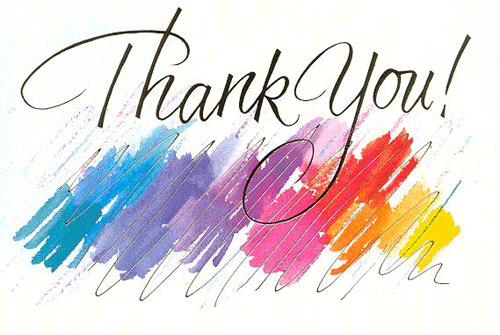